In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
no of unique values 73
*****************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
no of unique values 9
*****************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
no of unique values 21647
*****************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th             

## Checking for null values

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)


In [9]:
df.duplicated().sum()

0

#### Observations :-

- No missing values in the dataset.
- 6 numerical columns and 9 object columns with 32560 rows
- 24 duplicates were found which have been removed.
- Some of the features have minimum (requires re-check)
- Each feature has different scale range

# EDA

<AxesSubplot:xlabel='Workclass', ylabel='Count'>

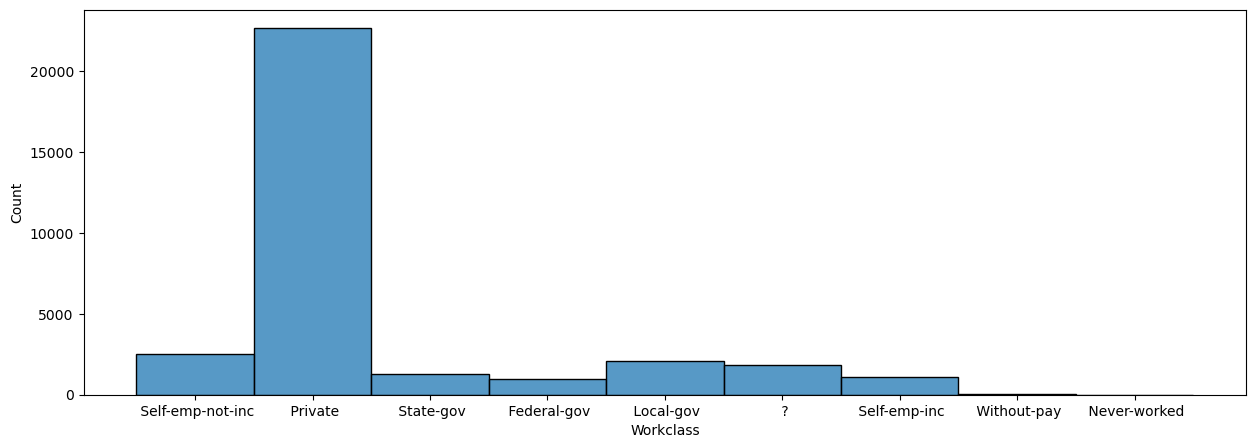

In [10]:
plt.figure(figsize=(15,5))
sns.histplot(df['Workclass'], bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

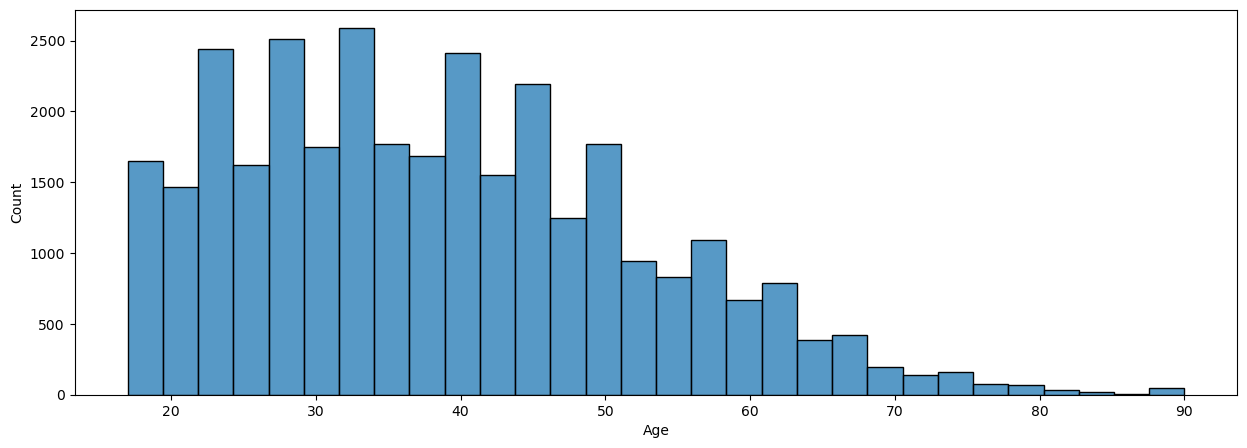

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(df['Age'], bins=30)

<AxesSubplot:xlabel='Education', ylabel='Count'>

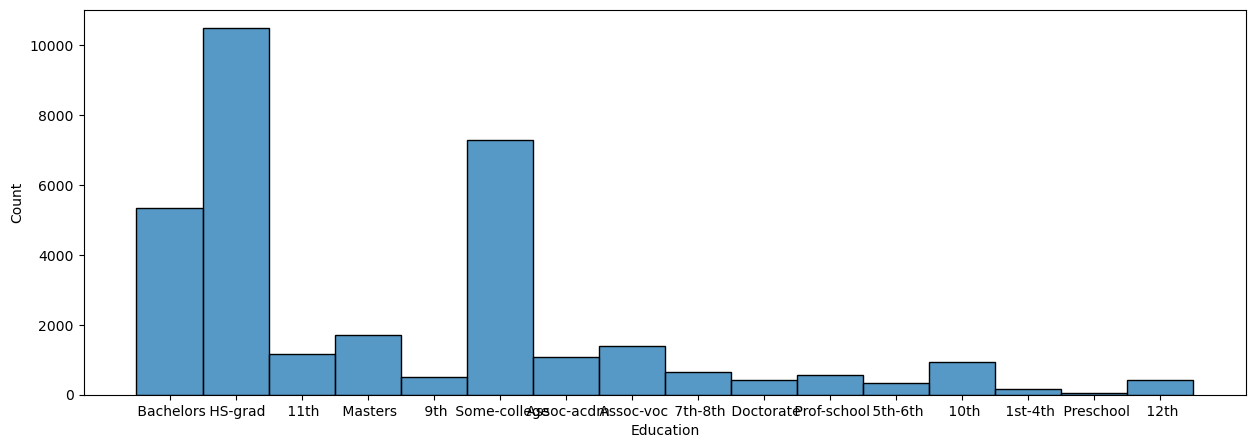

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(df['Education'], bins=30)

Most people have graduated from some college.

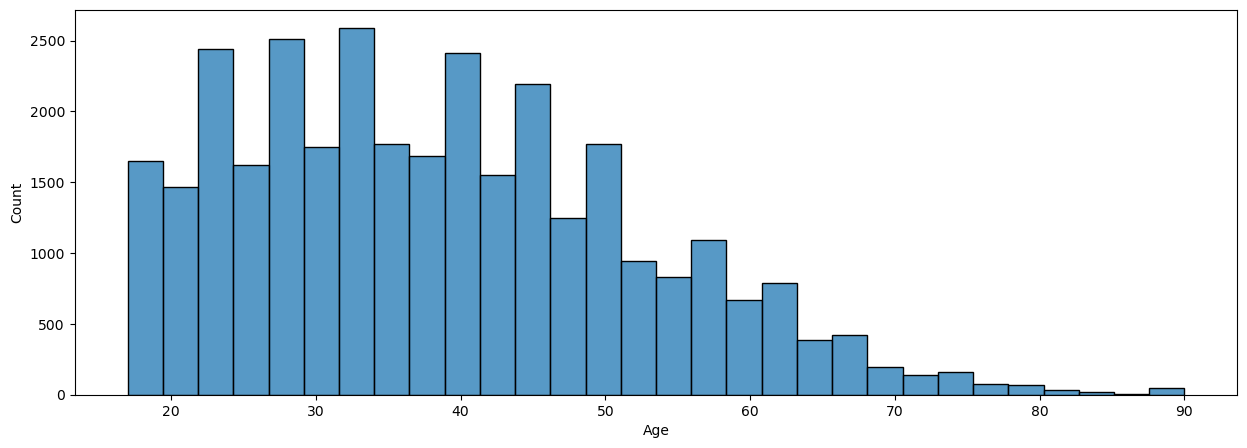

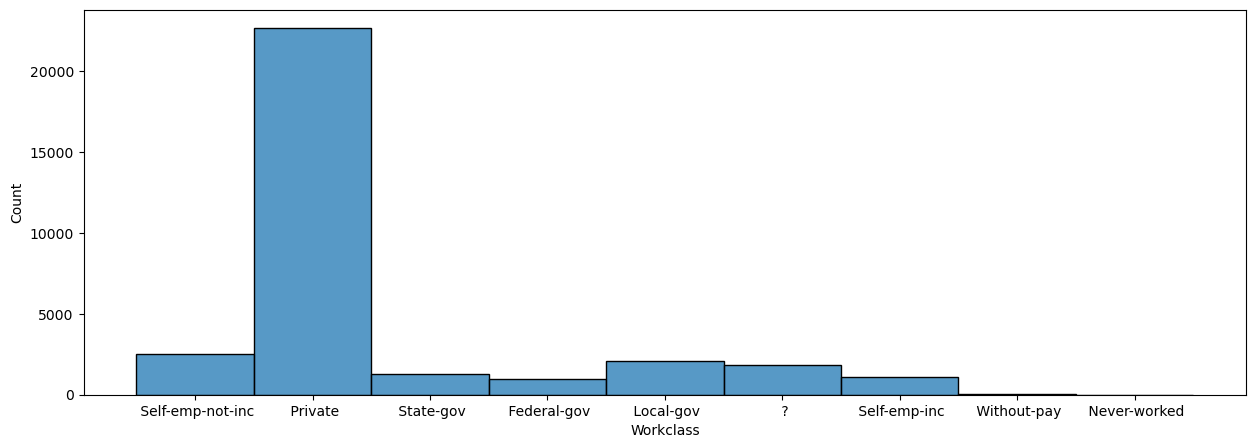

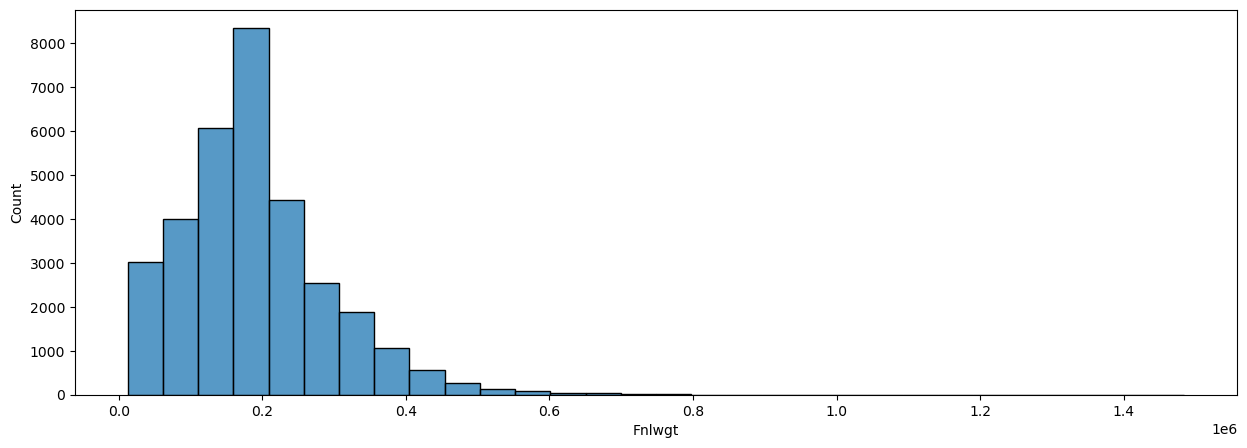

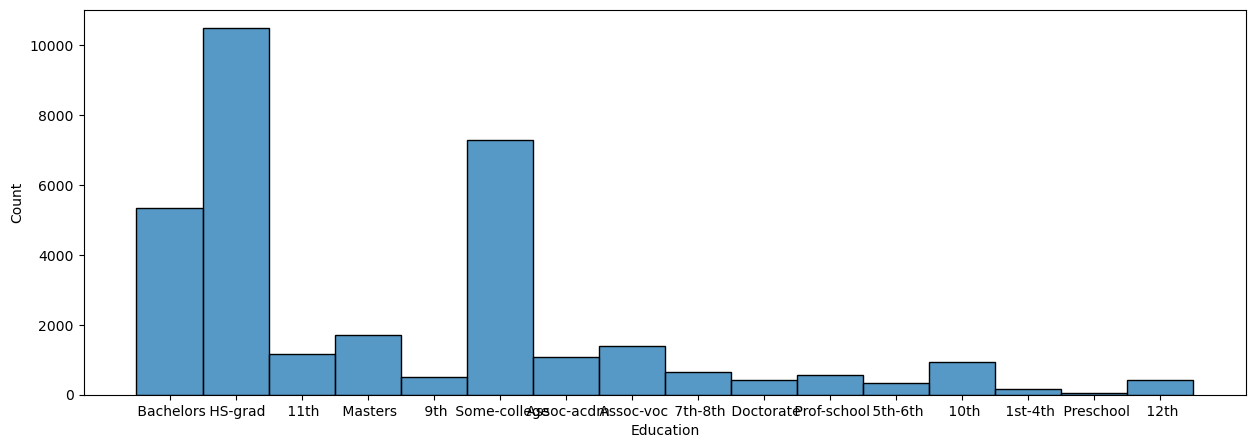

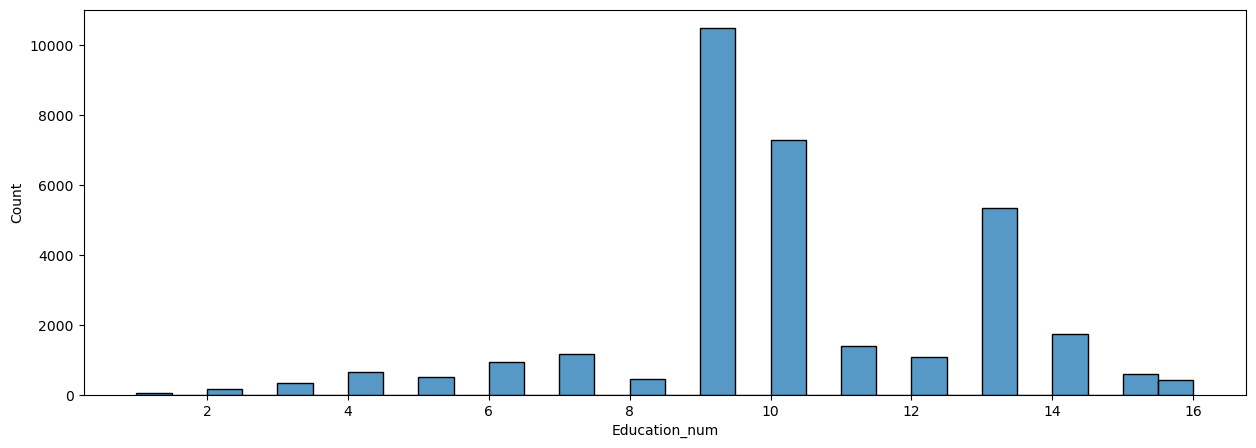

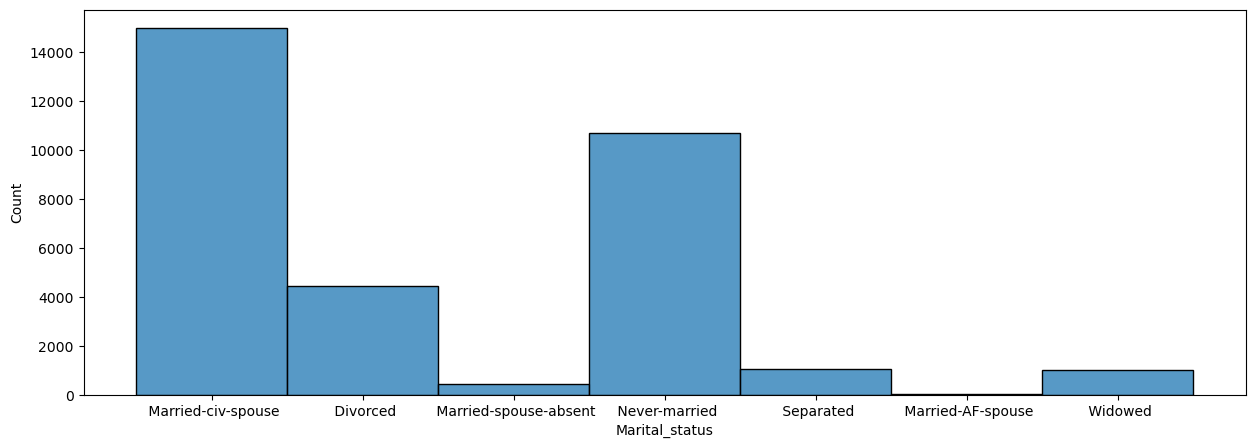

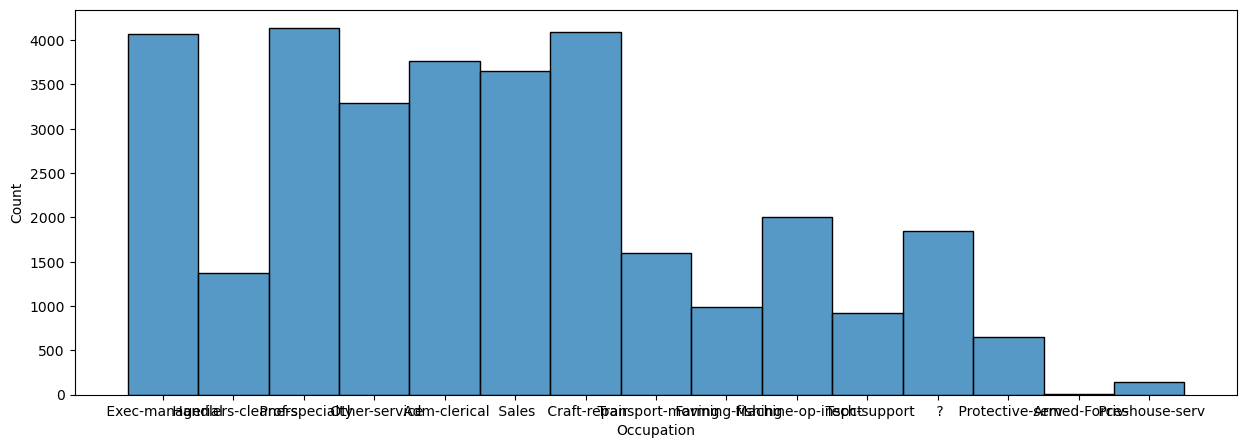

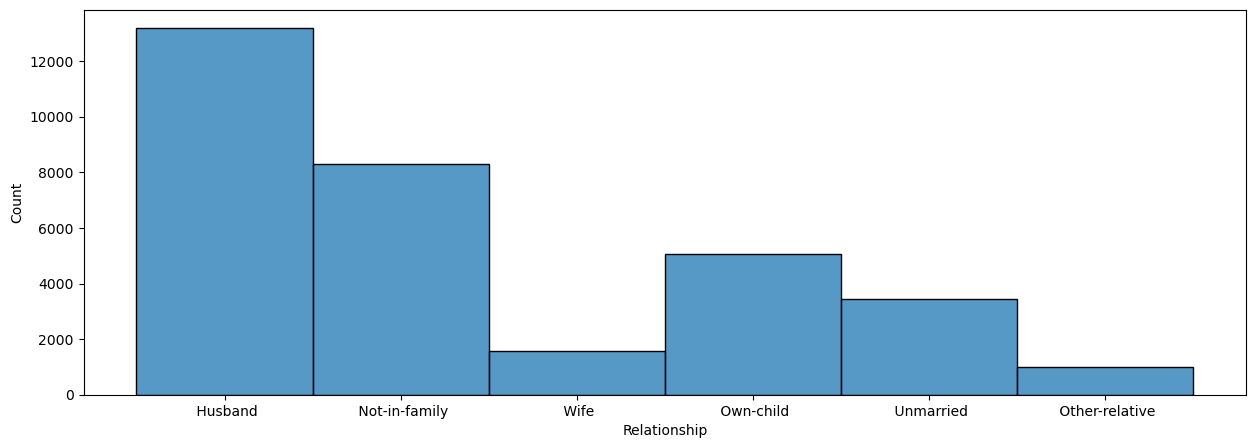

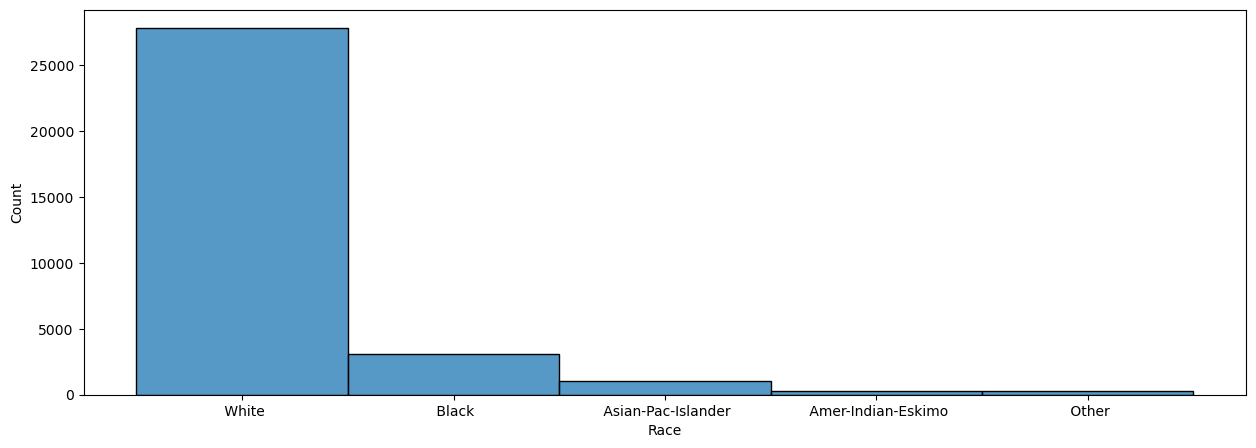

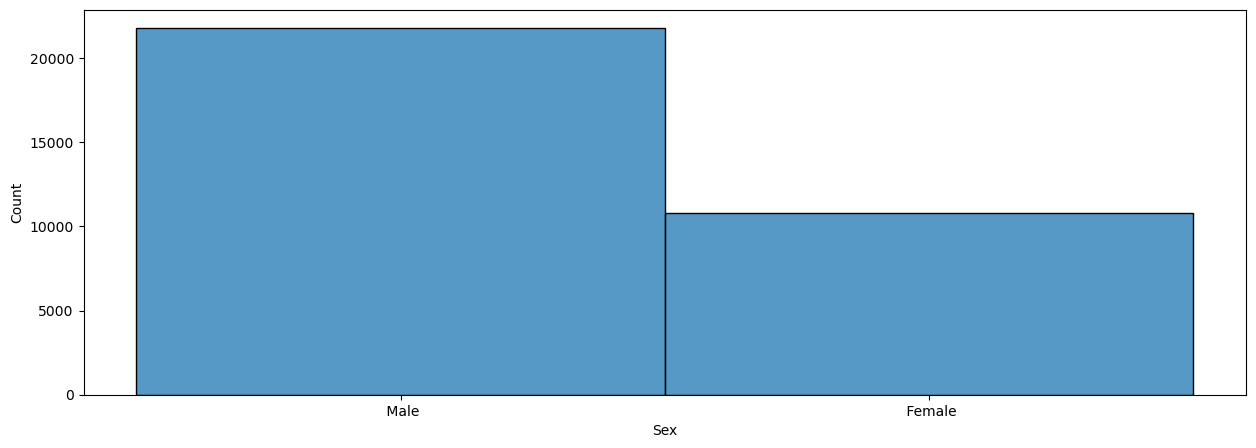

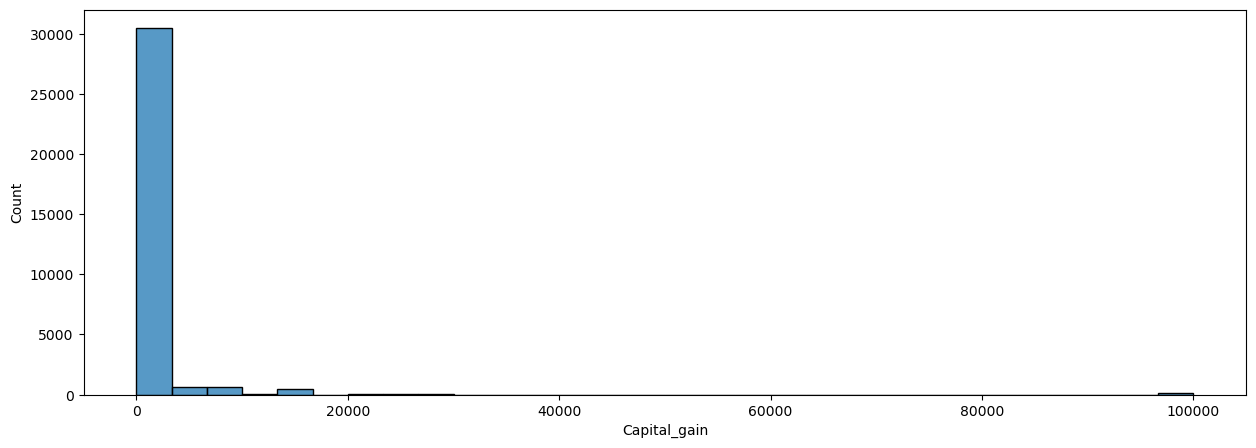

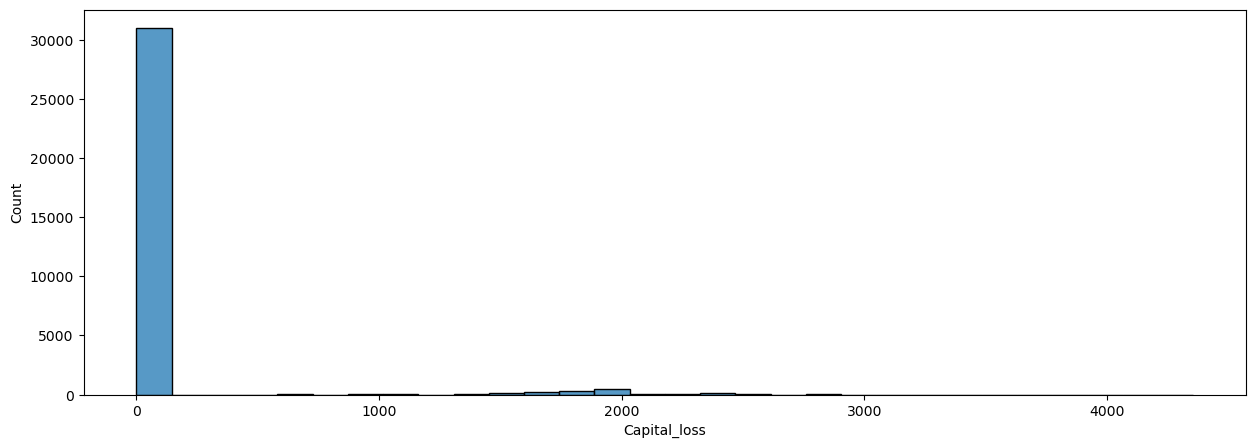

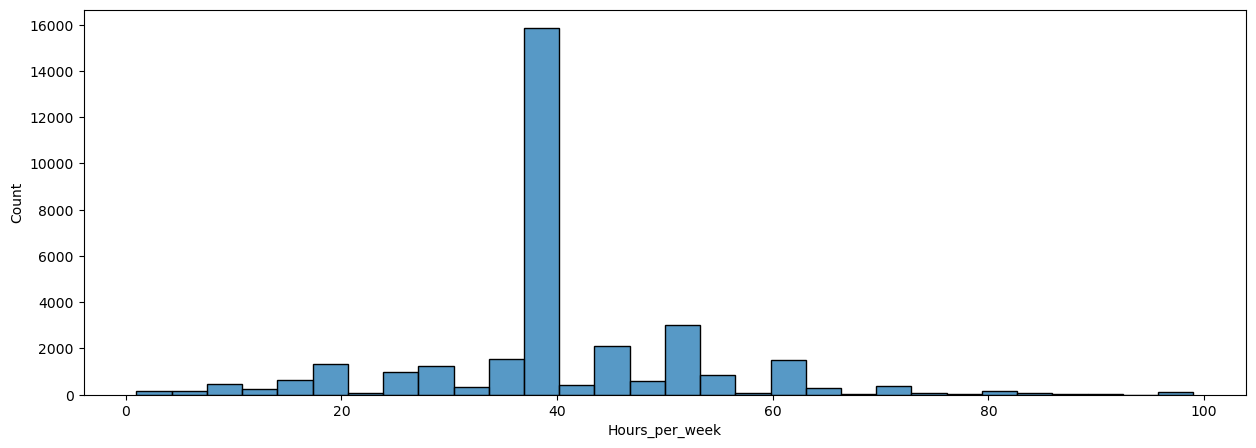

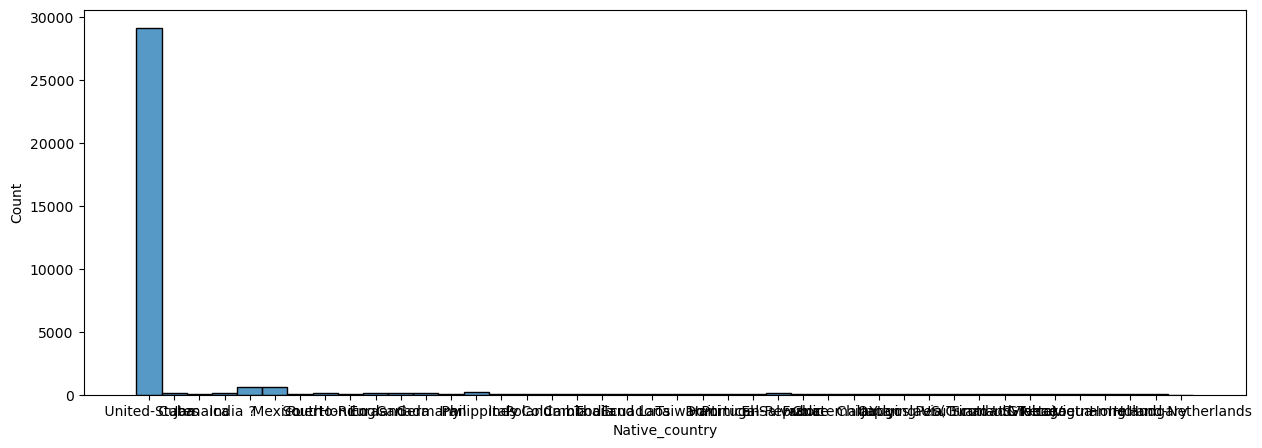

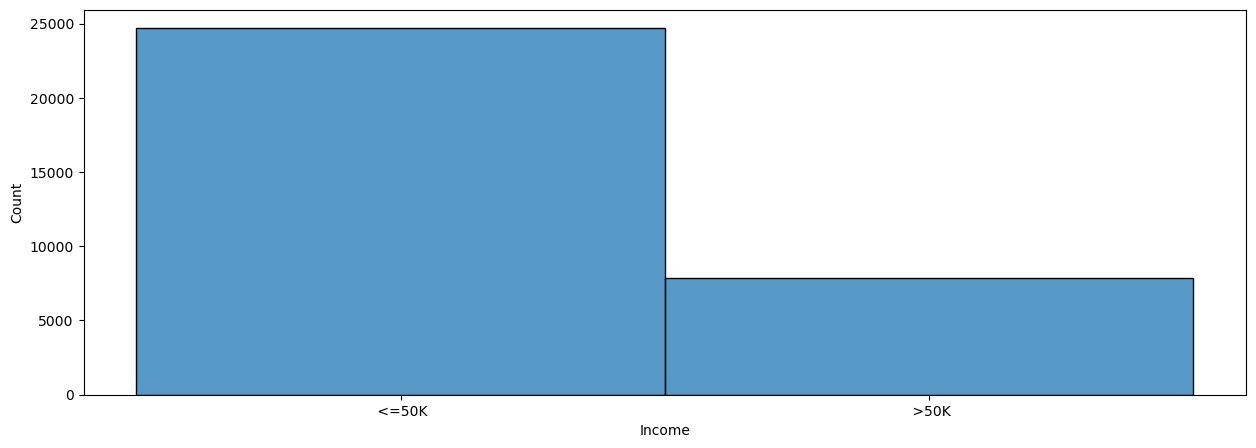

In [13]:
for i in df.columns:
    plt.figure(figsize=(15,5))
    sns.histplot(df[i], bins=30)
    plt.show()

Most employees are from private sector, rst all are almost equally divided.

Most are between age group of 25-45.

Most people have graduated from some college.

Very few people have capital gains and losses.

Most people work for 40 hours a week.



<AxesSubplot:>

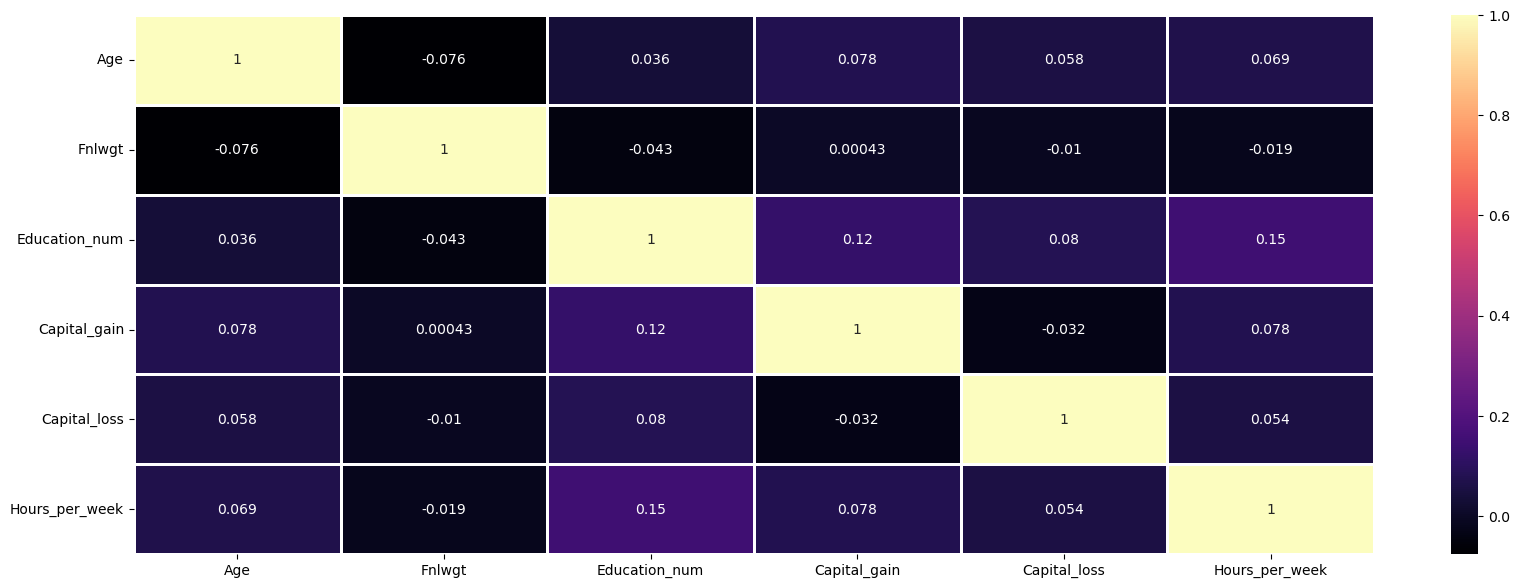

In [14]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='white',cmap='magma')

Multicolinearity is very low between the columns

## converting categorical to numerical

In [15]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [16]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Race']=le.fit_transform(df['Race'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Sex']=le.fit_transform(df['Sex'])
df['Relationship']=le.fit_transform(df['Relationship'])

In [17]:
# As columns Education and Education_num represent the same thing, we will drop column education
df1=df.drop("Education",axis=1)

In [18]:
df1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,4,257302,12,2,13,5,4,0,0,0,38,39,<=50K
32532,40,4,154374,9,2,7,0,4,1,0,0,40,39,>50K
32533,58,4,151910,9,6,1,4,4,0,0,0,40,39,<=50K
32534,22,4,201490,9,4,1,3,4,1,0,0,20,39,<=50K


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  int32 
 2   Fnlwgt          32536 non-null  int64 
 3   Education_num   32536 non-null  int64 
 4   Marital_status  32536 non-null  int32 
 5   Occupation      32536 non-null  int32 
 6   Relationship    32536 non-null  int32 
 7   Race            32536 non-null  int32 
 8   Sex             32536 non-null  int32 
 9   Capital_gain    32536 non-null  int64 
 10  Capital_loss    32536 non-null  int64 
 11  Hours_per_week  32536 non-null  int64 
 12  Native_country  32536 non-null  int32 
 13  Income          32536 non-null  object
dtypes: int32(7), int64(6), object(1)
memory usage: 2.6+ MB


## Skewness handling

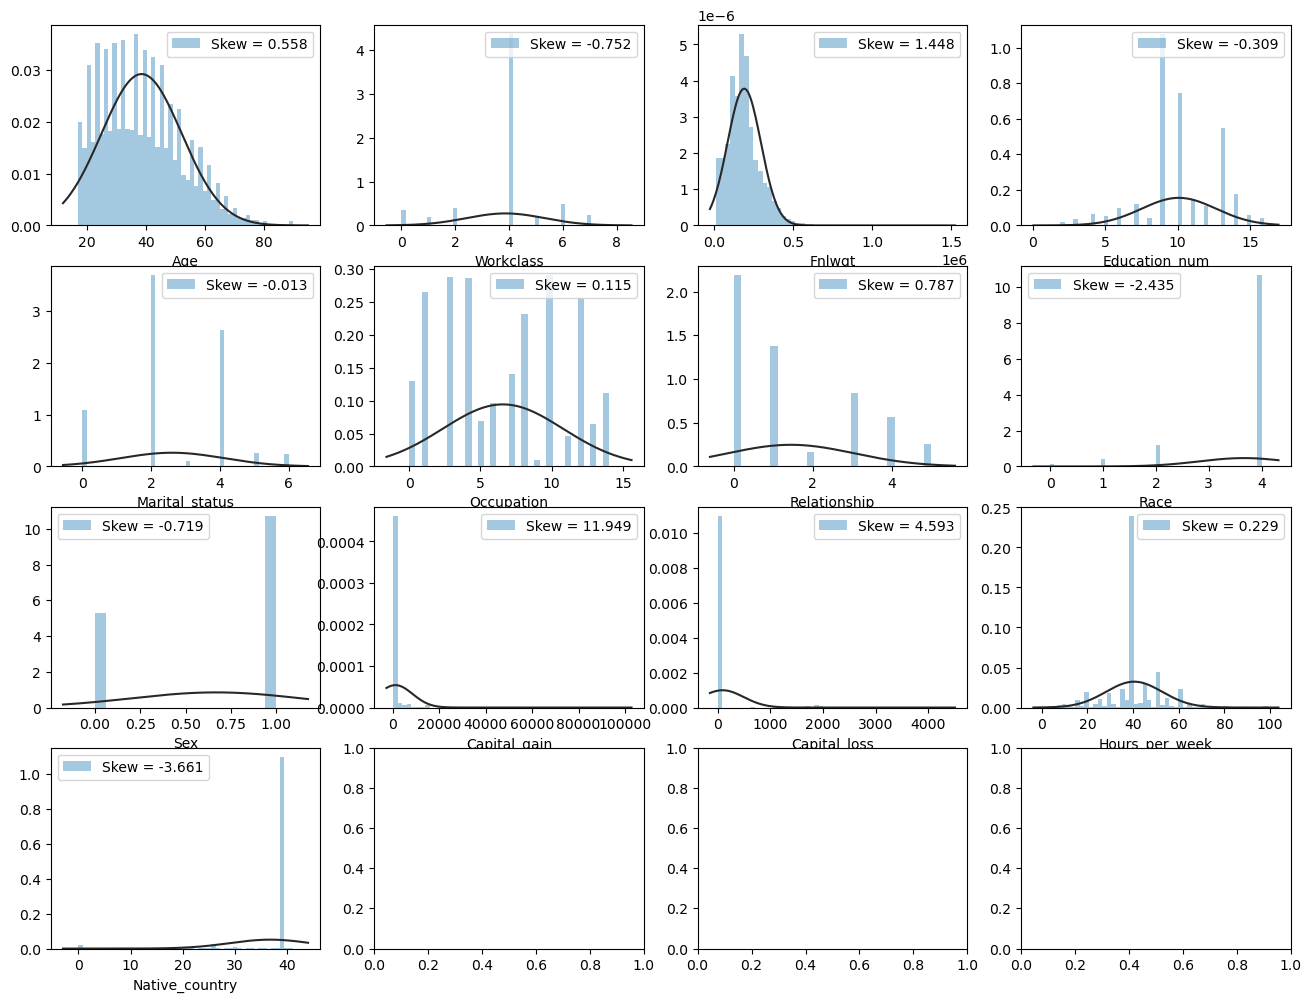

In [20]:
fig,ax = plt.subplots(4,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df1.drop("Income",axis=1).columns:
    skew = df1.drop("Income",axis=1)[col].skew()
    sns.distplot(df1.drop("Income",axis=1)[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [21]:
df1.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
dtype: float64

In [22]:
from sklearn.preprocessing import power_transform

df1[['Fnlwgt','Capital_gain','Capital_loss']]=power_transform(df[['Fnlwgt','Capital_gain','Capital_loss']],method='yeo-johnson')

We will not remove skewness from the categorical data.

In [23]:
df1.skew()

Age               0.557657
Workclass        -0.751854
Fnlwgt            0.016961
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
Native_country   -3.661060
dtype: float64

## Outliers handling

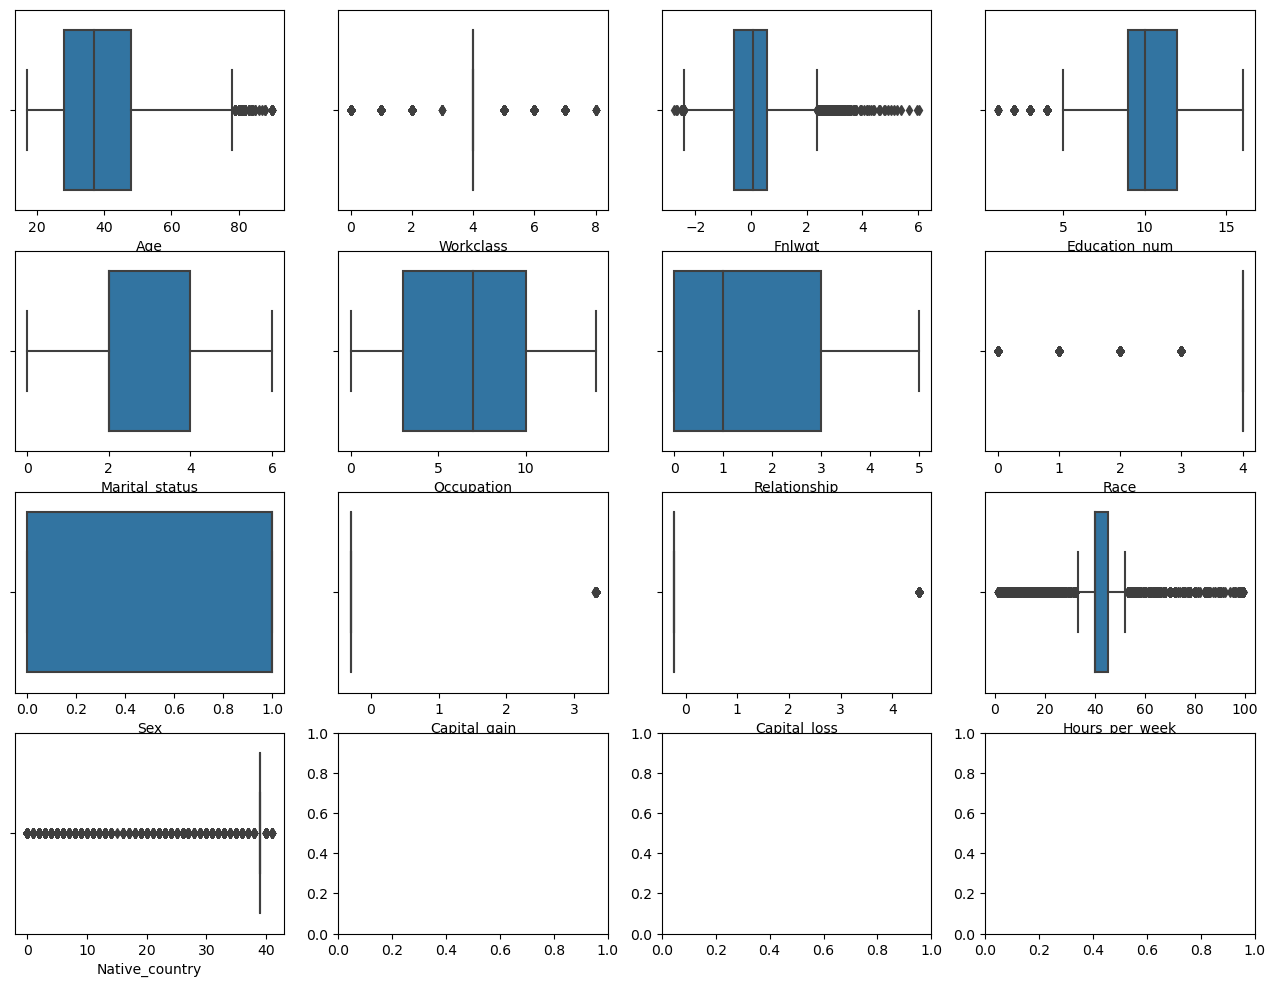

In [24]:
fig,ax = plt.subplots(4,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df1.drop("Income",axis=1).columns:
    skew = df1.drop("Income",axis=1)[col].skew()
    sns.boxplot(df1.drop("Income",axis=1)[col], ax = ax[i])  
    i += 1
plt.show()

In [25]:
z=np.abs(zscore(df1.drop("Income",axis=1)))
dfn=df1[(z<3).all(axis=1)]
dfn

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,-1.089960,13,2,4,0,4,1,-0.301491,-0.221299,13,39,<=50K
1,38,4,0.398771,9,0,6,1,4,1,-0.301491,-0.221299,40,39,<=50K
2,53,4,0.562562,7,2,6,0,2,1,-0.301491,-0.221299,40,39,<=50K
4,37,4,0.957178,14,2,4,5,4,0,-0.301491,-0.221299,40,39,<=50K
5,49,4,-0.131811,5,3,8,1,2,0,-0.301491,-0.221299,16,23,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,22,4,1.144012,10,4,11,1,4,1,-0.301491,-0.221299,40,39,<=50K
32531,27,4,0.746761,12,2,13,5,4,0,-0.301491,-0.221299,38,39,<=50K
32532,40,4,-0.193274,9,2,7,0,4,1,-0.301491,-0.221299,40,39,>50K
32533,58,4,-0.219732,9,6,1,4,4,0,-0.301491,-0.221299,40,39,<=50K


In [26]:
df1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,-1.089960,13,2,4,0,4,1,-0.301491,-0.221299,13,39,<=50K
1,38,4,0.398771,9,0,6,1,4,1,-0.301491,-0.221299,40,39,<=50K
2,53,4,0.562562,7,2,6,0,2,1,-0.301491,-0.221299,40,39,<=50K
3,28,4,1.340353,13,2,10,5,2,0,-0.301491,-0.221299,40,5,<=50K
4,37,4,0.957178,14,2,4,5,4,0,-0.301491,-0.221299,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,4,0.746761,12,2,13,5,4,0,-0.301491,-0.221299,38,39,<=50K
32532,40,4,-0.193274,9,2,7,0,4,1,-0.301491,-0.221299,40,39,>50K
32533,58,4,-0.219732,9,6,1,4,4,0,-0.301491,-0.221299,40,39,<=50K
32534,22,4,0.271699,9,4,1,3,4,1,-0.301491,-0.221299,20,39,<=50K


32536-25323=7213, which is 22% of the total data removed in outlier treatment

## Scaling of Independent features

In [30]:
X=dfn.iloc[:,:-1]
y=dfn.iloc[:,-1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [31]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.927510,1.478849,-1.113715,1.266396,-0.418960,-0.593996,-0.942484,0.351631,0.727756,5.551115e-17,-2.775558e-17,-2.390193,0.199132
1,0.027218,0.096461,0.405172,-0.409645,-1.721919,-0.123220,-0.316985,0.351631,0.727756,5.551115e-17,-2.775558e-17,0.029720,0.199132
2,1.152583,0.096461,0.572281,-1.247666,-0.418960,-0.123220,-0.942484,-2.897539,0.727756,5.551115e-17,-2.775558e-17,0.029720,0.199132
3,-0.047806,0.096461,0.974890,1.685407,-0.418960,-0.593996,2.185009,0.351631,-1.374087,5.551115e-17,-2.775558e-17,0.029720,0.199132
4,0.852485,0.096461,-0.136157,-2.085686,0.232519,0.347556,-0.316985,-2.897539,-1.374087,5.551115e-17,-2.775558e-17,-2.121314,-5.526244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25318,-1.173170,0.096461,1.165509,0.009365,0.883998,1.053719,-0.316985,0.351631,0.727756,5.551115e-17,-2.775558e-17,0.029720,0.199132
25319,-0.798049,0.096461,0.760211,0.847386,-0.418960,1.524494,2.185009,0.351631,-1.374087,5.551115e-17,-2.775558e-17,-0.149533,0.199132
25320,0.177267,0.096461,-0.198865,-0.409645,-0.418960,0.112168,-0.942484,0.351631,0.727756,5.551115e-17,-2.775558e-17,0.029720,0.199132
25321,1.527704,0.096461,-0.225859,-0.409645,2.186956,-1.300159,1.559510,0.351631,-1.374087,5.551115e-17,-2.775558e-17,0.029720,0.199132


In [32]:
y

0         <=50K
1         <=50K
2         <=50K
4         <=50K
5         <=50K
          ...  
32530     <=50K
32531     <=50K
32532      >50K
32533     <=50K
32534     <=50K
Name: Income, Length: 25323, dtype: object

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.8408519803757329


At random state 1, The training accuracy is :-0.8416896015316501


At random state 2, The training accuracy is :-0.8404929998803399


At random state 3, The training accuracy is :-0.8443221251645328


At random state 4, The training accuracy is :-0.8528179968888357


At random state 5, The training accuracy is :-0.8446811056599258


At random state 6, The training accuracy is :-0.8471939691276774


At random state 7, The training accuracy is :-0.8473136292928084


At random state 8, The training accuracy is :-0.8465956683020223


At random state 9, The training accuracy is :-0.8480315902835945


At random state 10, The training accuracy is :-0.8427665430178294


At random state 11, The training accuracy is :-0.8434845040086155


At random state 12, The training accuracy is :-0.8409716405408639


At random state 13, The training accuracy is :-0.8463563479717602


At random state 14, The training accuracy is :-0.852459016

At random state 22, The training accuracy is :-0.8547325595309322

In [41]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=22)

In [42]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(18992, 13) (18992,)
(6331, 13) (6331,)


In [37]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.8369925762122887 
 [[4936  204]
 [ 828  363]] 
               precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      5140
        >50K       0.64      0.30      0.41      1191

    accuracy                           0.84      6331
   macro avg       0.75      0.63      0.66      6331
weighted avg       0.82      0.84      0.81      6331
 

Cross Validation Score is : [0.83364043 0.82442748 0.82438125 0.82675092 0.8283307 ]
Mean Score : 0.8275061575612106


accuracy score for  GaussianNB() is :  0.7708102985310378 
 [[4042 1098]
 [ 353  838]] 
               precision    recall  f1-score   support

       <=50K       0.92      0.79      0.85      5140
        >50K       0.43      0.70      0.54      1191

    accuracy                           0.77      6331
   macro avg       0.68      0.74      0.69      6331
weighted avg       0.83      0.77      0.79      6331
 

Cross Validation Score is : [0.781521

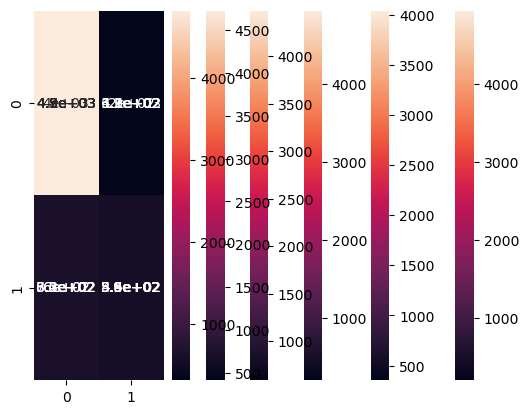

In [43]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

## Hyperparameter tuning

In [45]:
    
dict2={"random_state":[50,100,200],"criterion":['gini', 'entropy',],"min_samples_split":[2,3]}
gv=GridSearchCV(rfc,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'gini', 'min_samples_split': 3, 'random_state': 50}

In [46]:
rf1=RandomForestClassifier(criterion='gini', min_samples_split=3 , random_state= 50)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8549992102353499
Cross Validation Score is : [0.84127402 0.84259016 0.83464982 0.83965245 0.8504476 ]
Mean Score : 0.8417228086269203


In [50]:
import joblib
joblib.dump(rf1,"salary_rfc.obj")

['salary_rfc.obj']

In [51]:
rfr=joblib.load('salary_rfc.obj')

In [52]:
result=rfr.predict(test_x)

In [53]:
print(accuracy_score(test_y,result))

0.8549992102353499
